In [41]:
!pip install import-ipynb
import import_ipynb
#from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.transforms import ToPILImage
from torchvision.utils import save_image
import os
from PIL import Image
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/My Drive/Colab Notebooks/CNN_Utility"

/content/gdrive/My Drive/Colab Notebooks/CNN_Utility


In [0]:
from dataloaders import train_test_dataloaders,transformations, AlbumentationWrapper
from models import BasicBlock,Bottleneck,ResNet,ResNet18,model_params,Net,model_params
from graphs_and_other_utility_functions import plot,save_model,get_lr
from train_test import train,test
import grad_cam
from main import demo1

In [0]:
train_transforms , test_transforms=AlbumentationWrapper('train'), AlbumentationWrapper('test')

In [7]:
trainloader, testloader = train_test_dataloaders(1, 128, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
#it=iter(trainloader)
data,target=next(it)
#print(type(data))
#print(data.shape)
save_image(data[0], 'img1.png')

In [0]:
model =  ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,15,20,28], gamma=0.1)
epochs=30
input_size=(3,32,32)

  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.731925368309021 Batch_id=390 Accuracy=29.16: 100%|██████████| 391/391 [00:53<00:00,  7.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 4113/10000 (41.13%)

EPOCH: 1 LR: 0.1 


Loss=1.2973048686981201 Batch_id=390 Accuracy=47.40: 100%|██████████| 391/391 [00:54<00:00,  7.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5158/10000 (51.58%)

EPOCH: 2 LR: 0.1 


Loss=1.196051001548767 Batch_id=390 Accuracy=56.98: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6161/10000 (61.61%)

EPOCH: 3 LR: 0.1 


Loss=0.8427812457084656 Batch_id=390 Accuracy=65.07: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6304/10000 (63.04%)

EPOCH: 4 LR: 0.1 


Loss=0.6355878114700317 Batch_id=390 Accuracy=71.27: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7164/10000 (71.64%)

EPOCH: 5 LR: 0.1 


Loss=0.6987928152084351 Batch_id=390 Accuracy=75.98: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6542/10000 (65.42%)

EPOCH: 6 LR: 0.1 


Loss=0.6756076216697693 Batch_id=390 Accuracy=79.12: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7620/10000 (76.20%)

EPOCH: 7 LR: 0.1 


Loss=0.5524809956550598 Batch_id=390 Accuracy=81.16: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7829/10000 (78.29%)

EPOCH: 8 LR: 0.1 


Loss=0.7179192304611206 Batch_id=390 Accuracy=82.56: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8049/10000 (80.49%)

EPOCH: 9 LR: 0.1 


Loss=0.6099838018417358 Batch_id=390 Accuracy=83.55: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7923/10000 (79.23%)

EPOCH: 10 LR: 0.010000000000000002 


Loss=0.22648051381111145 Batch_id=390 Accuracy=90.45: 100%|██████████| 391/391 [00:55<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8754/10000 (87.54%)

EPOCH: 11 LR: 0.010000000000000002 


Loss=0.13364669680595398 Batch_id=390 Accuracy=92.69: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8794/10000 (87.94%)

EPOCH: 12 LR: 0.010000000000000002 


Loss=0.21647357940673828 Batch_id=390 Accuracy=93.99: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8832/10000 (88.32%)

EPOCH: 13 LR: 0.010000000000000002 


Loss=0.18306012451648712 Batch_id=390 Accuracy=94.96: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8821/10000 (88.21%)

EPOCH: 14 LR: 0.010000000000000002 


Loss=0.22576959431171417 Batch_id=390 Accuracy=96.01: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8798/10000 (87.98%)

EPOCH: 15 LR: 0.0010000000000000002 


Loss=0.07323645055294037 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8850/10000 (88.50%)

EPOCH: 16 LR: 0.0010000000000000002 


Loss=0.03277912735939026 Batch_id=390 Accuracy=97.69: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8854/10000 (88.54%)

EPOCH: 17 LR: 0.0010000000000000002 


Loss=0.047163210809230804 Batch_id=390 Accuracy=97.82: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8854/10000 (88.54%)

EPOCH: 18 LR: 0.0010000000000000002 


Loss=0.1328820139169693 Batch_id=390 Accuracy=98.11: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8872/10000 (88.72%)

EPOCH: 19 LR: 0.0010000000000000002 


Loss=0.04426398128271103 Batch_id=390 Accuracy=98.22: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8862/10000 (88.62%)

EPOCH: 20 LR: 0.00010000000000000003 


Loss=0.05959245562553406 Batch_id=390 Accuracy=98.33: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8856/10000 (88.56%)

EPOCH: 21 LR: 0.00010000000000000003 


Loss=0.08444792777299881 Batch_id=390 Accuracy=98.35: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8859/10000 (88.59%)

EPOCH: 22 LR: 0.00010000000000000003 


Loss=0.06477872282266617 Batch_id=390 Accuracy=98.31: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8853/10000 (88.53%)

EPOCH: 23 LR: 0.00010000000000000003 


Loss=0.15906989574432373 Batch_id=390 Accuracy=98.45: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8854/10000 (88.54%)

EPOCH: 24 LR: 0.00010000000000000003 


Loss=0.04464297741651535 Batch_id=390 Accuracy=98.43: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8865/10000 (88.65%)

EPOCH: 25 LR: 0.00010000000000000003 


Loss=0.06578785181045532 Batch_id=390 Accuracy=98.39: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8868/10000 (88.68%)

EPOCH: 26 LR: 0.00010000000000000003 


Loss=0.06735028326511383 Batch_id=390 Accuracy=98.47: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8872/10000 (88.72%)

EPOCH: 27 LR: 0.00010000000000000003 


Loss=0.035151802003383636 Batch_id=390 Accuracy=98.49: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8863/10000 (88.63%)

EPOCH: 28 LR: 1.0000000000000004e-05 


Loss=0.22040989995002747 Batch_id=390 Accuracy=98.50: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8853/10000 (88.53%)

EPOCH: 29 LR: 1.0000000000000004e-05 


Loss=0.05536068230867386 Batch_id=390 Accuracy=98.42: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]



Test set: Average loss: 0.0029, Accuracy: 8864/10000 (88.64%)



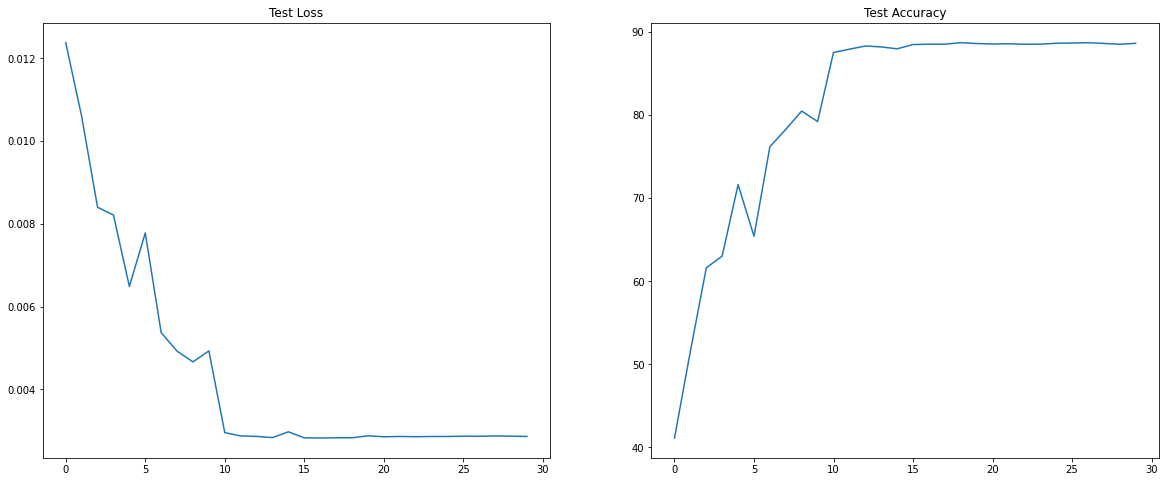

In [10]:
train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
model_params(model, input_size,device)  

for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    train(model, device, trainloader, optimizer, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2)
    test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, {})
    scheduler.step()
plot(train_losses_without_L1_L2,train_acc_without_L1_L2, test_losses_without_L1_L2, test_acc_without_L1_L2, 'without L1 and L2')
save_model(model, '/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/Assign-9.pth')

In [11]:
checkpoint = torch.load('/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/Assign-9.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model_params(model, input_size,device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [52]:
demo1(["/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/img1.png"],"layer4.1.shortcut","resnet18" ,10,"/content/gdrive/My Drive/Colab Notebooks/CNN_Utility", True, model)
#demo1(["/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/img1.png"],"layer4.2","resnet152" ,3,"/content/gdrive/My Drive/Colab Notebooks/CNN_Utility", True, None)

Device: Tesla P4
['/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/img1.png']
Images: ['/content/gdrive/My Drive/Colab Notebooks/CNN_Utility/img1.png']
	#0: /content/gdrive/My Drive/Colab Notebooks/CNN_Utility/img1.png
Grad-CAM/Guided Backpropagation/Guided Grad-CAM:
dict_keys(['conv1', 'bn1', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.shortcut', 'layer1.0', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.shortcut', 'layer1.1', 'layer1', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.shortcut.0', 'layer2.0.shortcut.1', 'layer2.0.shortcut', 'layer2.0', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.shortcut', 'layer2.1', 'layer2', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.shortcut.0', 'layer3.0.shortcut.1', 'layer3.0.shortcut', 'layer3.0', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.conv2', 'layer3.1.bn2', 'layer3.1.short

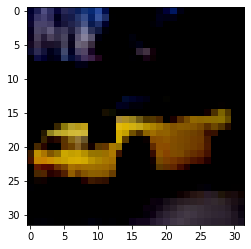

In [53]:
#Actual Image
img=mpimg.imread('img1.png')
imgplot = plt.imshow(img)
plt.show()

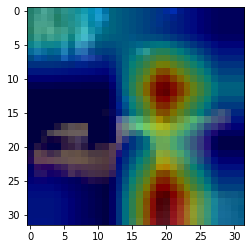

In [54]:
img=mpimg.imread('0-resnet18-gradcam-layer4.1.shortcut.png')
imgplot = plt.imshow(img)
plt.show()